In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu Sep  8 11:10:23 2022

@author: IVAN
"""

# from tkinter import N, Y
# from tkinter.tix import Y_REGION
%pip install facial_keypoints_detecter
import landmarks_utils as lutlis
import numpy as np
# from pathlib import Path
import matplotlib.pyplot as plt
import cv2
import os
import facial_keypoints_detecter as fkd
import deeplake


Note: you may need to restart the kernel to use updated packages.

Importing package 'facial_keypoints_detecter'...
  + Adding module 'auxil'...


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


  - Done!
  + Adding module 'plots'...
  - Done!
  + Adding module 'data'...
  - Done!
  + Adding module 'model'...
  - Done!
  + Adding module 'preprocessing'...
  - Done!
Package 'facial_keypoints_detecter' imported sucessfully !!
version 1.0.0



c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\deeplake\util\check_latest_version.py:32: UserWarning: A newer version of deeplake (3.1.7) is available. It's recommended that you update to the latest version using `pip install -U deeplake`.
  warnings.warn(


In [2]:
# Read dataset

input_images_path = "../Helen_testset2/y_pred"
files_names = os.listdir(input_images_path)
#print(files_names)

images_names=[]

for i in range(0,len(files_names)):
    name=str(files_names[i][:-4])
    if name not in images_names:
        images_names.append(name)


In [3]:

n_images = len(images_names)
print(n_images)
NME = []
CED68 = np.zeros((n_images, 4))
bins = []
for i in range(1, n_images+1):
    bins.append(round(i/n_images,4))



330


In [4]:
'''
def nme_per_method(method):
    NME = []
    failure_rate = 0
    for i in images_names:
        y_true = lutlis.read_landmarks("../Helen_testset/"+i+".pts")
        if method==1:
            y_pred , Df = lutlis.kevin_vinueza("../Helen_testset/"+i+".jpg") 
        elif method==2:
            y_pred , Df = lutlis.Dlib_Model("../Helen_testset/"+i+".jpg")
        nme68 = lutlis.my_NME_image(y_pred, y_true)
        NME.append(nme68)
        if nme68 >= 0.08:
            failure_rate = failure_rate + 1
        print('Imagen: ',i)
        print('NME: ',nme68)
    NME.sort() # ascending order
    print("NME averaged:", np.mean(NME))
    print("Failure rate:", (failure_rate/n_images)*100)
    return NME
'''
def nme_per_method(method):

    NME = []
    failure_rate = 0
    for i in range(1, n_images+1):
        nme68=0
        try:
            y_true = lutlis.read_landmarks("../Helen_testset2/y_true/chao ("+str(i)+").pts")
            if method==1:
                y_pred , Df = lutlis.Dlib_Model("../Helen_testset2/y_pred/hola"+" ("+str(i)+")"+".jpg")
            elif method==2:
                y_pred , Df = lutlis.kevin_vinueza("../Helen_testset2/y_pred/hola"+" ("+str(i)+")"+".jpg")
            elif method==3:
                y_pred , Df = lutlis.charlie("../Helen_testset2/y_pred/hola"+" ("+str(i)+")"+".jpg")
            elif method==4:
                y_pred , Df = lutlis.karelis("../Helen_testset2/y_pred/hola"+" ("+str(i)+")"+".jpg")
      
            nme68 = lutlis.my_NME_image(y_pred, y_true)
            print(nme68)
            NME.append(nme68)
        except:
            nme68=1
            NME.append(nme68)
        if nme68 >= 0.08:
            failure_rate = failure_rate + 1
    NME.sort() # ascending order
    print("NME averaged:", np.mean(NME))
    print("Failure rate:", (failure_rate/n_images)*100)
    return NME

In [5]:
def _plot_curves(bins, ced_values, legend_entries, title, x_limit=0.08,
                 colors=None, linewidth=20, fontsize=12, figure_size=None):
    # number of curves
    _, n_curves = np.shape(ced_values)
    print(n_curves)
    
    # if no colors are provided, sample them from the jet colormap
    if colors is None:
        cm = plt.get_cmap('jet')
        colors = [cm(1.*i/n_curves)[:3] for i in range(n_curves)]
        
    # plot all curves
    fig = plt.figure()
    ax = plt.gca()
    for i in range(n_curves):
        x = ced_values[:,i]
        plt.plot(x, bins, color=colors[i],
                 linestyle='-',
                 linewidth=linewidth, 
                 label=legend_entries[i])
        # plt.fill_between(x, bins)  
    # legend
    ax.legend(prop={'size': fontsize}, loc=0)
    
    # axes
    for l in (ax.get_xticklabels() + ax.get_yticklabels()):
        l.set_fontsize(fontsize)
    ax.set_xlabel('NME', fontsize=fontsize)
    ax.set_ylabel('Images Proportion', fontsize=fontsize)
    ax.set_title(title, fontsize=fontsize)

    # set axes limits
    ax.set_xlim([0., x_limit]) # set the x-axis view limits
    ax.set_ylim([0., 1.]) # # set the y-axis view limits
    ax.set_yticks(np.arange(0., 1.1, 0.1)) # set the current tick locations and labels of the y-axis
    
    # grid
    plt.grid('on', linestyle='--', linewidth=0.5)
    
    # figure size
    if figure_size is not None:
        fig.set_size_inches(np.asarray(figure_size))

In [6]:
def plot_results(x_limit=2, colors=None, markers=None, linewidth=3,
                 fontsize=12, figure_size=(11, 6)):
    legend_entries = []
    participants = ['Shashank Kumbhare', 'Palaniappan','Thulasimani','Savin']
    for f in participants:
        legend_entries.append(f + ' et al.')
    title = 'CED Curve'
    _plot_curves(bins, CED68, legend_entries, title, x_limit=x_limit,
                 colors=colors, linewidth=linewidth, fontsize=fontsize,
                 figure_size=figure_size)


In [7]:
# Area bajo la curva usando la fórmula del área del trapecio.
# Trapecio es un cuadrilátero que tiene solamente un par de lados paralelos
def calcular_AUC(X, Y):
    areaTotal=0
    for i in range(n_images-1):
        x = X[i]
        x2 = X[i+1]
        y = Y[i]
        y2 = Y[i+1]
        # area = (base1+base2) * altura / 2
        # the bases are the parallel sides of the trapezoid
        area = (y + y2)*(x2 - x)/2
        areaTotal += area
    return round(areaTotal,4)


In [8]:
#Dlib

NME=[]
NME=nme_per_method(1)
NME.sort()
CED68[:,1]=NME

failure_rate = len(list(filter(lambda x:(x > 0.08), NME)))
print("Failure rate: ", failure_rate/n_images)
print("AUC: ", calcular_AUC(NME, bins))



0.03680076413820315
0.024677016356805397
0.03584626529831629
0.029003134661763352
0.02429746068167196
2.424092182666356
0.014108865518171473
0.014885956693765764
0.02615117882125826
0.023116132278454382
0.027540672972317944
0.021352357974334053
0.024620679819731442
0.03789372282062091
0.04239369188620545
0.019574504691443263
0.03588297131824858
0.03171403628827683
1.5106764528021772
0.01601191010943021
0.02450772655692454
0.020123929331777732
1.5887473405155863
0.019651356863834974
2.518198799239658
0.02887832738692367
0.01595868298006352
0.020359226373089786
0.02456373765141941
0.023138286435921668
0.035258360479926164
0.03157747859161889
0.020632240539482573
0.018382384865580876
0.018382384865580876
0.01560111798775472
0.02895645046349835
0.027888113187819908
0.024270496078471898
0.02712090695996935
0.029027651911119307
0.01877817218040763
0.026550238344153328
0.03661417633840843
0.03432656984220101
0.019103707140112263
0.019566217378889927
0.014974614655411576
0.07128464373127265
0.

In [9]:
#Kevin Vinueza
import random
NME=[]
NME = nme_per_method(2)
NME.sort()
CED68[:,0]=NME

failure_rate = len(list(filter(lambda x:(x > 0.08), NME)))
print("Failure rate: ", failure_rate/n_images)
print("AUC: ", calcular_AUC(NME, bins))


3.6047245015604097
2.9113473603061983
1.4915872549764126
2.8603509065019637
3.491691198711443
3.768260178791052
3.189945578906922
3.1844380827489163
2.924674620478305
1.861488664992096
3.8452565493796134
3.191024774591264
2.4315510882533276
3.7240922166066603
2.4015444404201527
2.030476912579571
2.1403507294814075
2.424080451704057
3.640231438599242
3.109861959018655
3.2747744910801706
3.1104982959716883
3.2724432162213204
3.60642314379288
3.8098987254088446
3.446412016704785
2.946482608926691
1.9254014953549388
2.654868620063196
3.262973562366805
3.4691936685862585
1.9038955818546792
1.9031935959088435
2.366530103600701
2.366530103600701
3.534665183033511
3.2471664822266404
3.8009647804468867
3.9493456666944717
3.3032016387648593
3.845772511763614
3.2636058317562986
2.234271242235467
3.339206431195032
2.4159812052781042
2.8503832238339126
3.3269708825163957
3.061276505588195
2.37652760735498
1.9476694688391873
3.138300067738954
3.547731890333385
3.198298650264453
3.676702758706223
1.8

In [10]:
#Karelis
NME=[]
NME = nme_per_method(4)
NME.sort()
CED68[:,3]=NME
failure_rate = len(list(filter(lambda x:(x > 0.08), NME)))
print("Failure rate: ", failure_rate/n_images)
print("AUC: ", calcular_AUC(NME, bins))


2.408523279079805
0.27301136108675406
0.20167212658510367
0.8033326742770827
0.4644830887383426
0.5711029835932399
2.1962768881472603
0.7005779169524403
1.8970532830254296
1.000388609226372
1.0944852922731376
1.0988157496013482
0.9547447071854815
2.5780093586366606
1.555398264305438
1.3233878111031625
1.3850764657498653
1.575029620482537
1.2703152773660433
2.1224437871068744
2.258271119567528
0.9627344703585562
1.4178936631369459
1.0527819759492107
0.6860406689308849
2.2439157666651335
0.9692050994334905
0.1054726023964298
0.9045547642785255
1.0776428017230137
1.4871091833066095
0.12892688549154724
1.5838751187877143
1.711205749444407
1.711205749444407
2.669933194741726
2.4733795688025473
2.3671282853966975
3.088138864539964
2.243267954450935
2.2205308786825895
1.667829667281733
1.083657672204829
2.0533524308631
0.7330276523969086
1.8984878092559736
1.9645817980850417
2.41325482111772
1.188739226982716
1.3471114782151123
1.038772676175694
2.3168726230950756
2.1556044601360203
2.5514108

In [11]:
#Charlie

NME=[]
NME = nme_per_method(3)
NME.sort()
CED68[:,2]=NME
failure_rate = len(list(filter(lambda x:(x > 0.08), NME)))
print("Failure rate: ", failure_rate/n_images)
print("AUC: ", calcular_AUC(NME, bins))


0.2914296874326286
0.0063667958115958415
0.009034184016098571
0.009103031405869006
0.008849315248554005
0.005276859919674696
0.005365198957977129
0.010734786229659331
0.2784504054635242
0.007654786440802139
0.014031361479536542
0.7081671665091042
0.007557026249240013
0.013093608837790776
0.0
0.00431935693910948
0.020499514310277047
0.010110639142649308
0.9274513434526641
0.30370969467358977
0.4937531928322006
0.006386115728440372
0.006791341657404115
0.2817859095484514
0.0
0.0
0.005706780758918024
0.006277719629032378
0.007788967875048872
0.005627042672416218
0.008328152613508883
0.25887327005944455
0.0071819863056722544
0.005004275118257002
0.005004275118257002
0.004404009393123208
0.007734592117846073
0.010280588484604593
0.007824663683792086
0.007880813083459696
0.008210783499680399
0.006632040739047621
0.010170214250899907
0.36836011526057894
0.0
0.44471433708917213
0.3560585224968176
1.2239919959028733
0.0
0.011550247195833354
0.005517587941306088
0.010632639819535846
0.0093004004

In [12]:
#Darwin
'''
NME = nme_per_method(1,4)
NME.sort()
CED68[:,0]=NME
failure_rate = len(list(filter(lambda x:(x > 0.08), NME)))
print("Failure rate: ", failure_rate/n_images)
print("AUC: ", calcular_AUC(NME, bins))
'''

'\nNME = nme_per_method(1,4)\nNME.sort()\nCED68[:,0]=NME\nfailure_rate = len(list(filter(lambda x:(x > 0.08), NME)))\nprint("Failure rate: ", failure_rate/n_images)\nprint("AUC: ", calcular_AUC(NME, bins))\n'

In [13]:
#Jorge
'''
NME = nme_per_method(1,5)
NME.sort()
CED68[:,0]=NME
failure_rate = len(list(filter(lambda x:(x > 0.08), NME)))
print("Failure rate: ", failure_rate/n_images)
print("AUC: ", calcular_AUC(NME, bins))
'''

'\nNME = nme_per_method(1,5)\nNME.sort()\nCED68[:,0]=NME\nfailure_rate = len(list(filter(lambda x:(x > 0.08), NME)))\nprint("Failure rate: ", failure_rate/n_images)\nprint("AUC: ", calcular_AUC(NME, bins))\n'

4


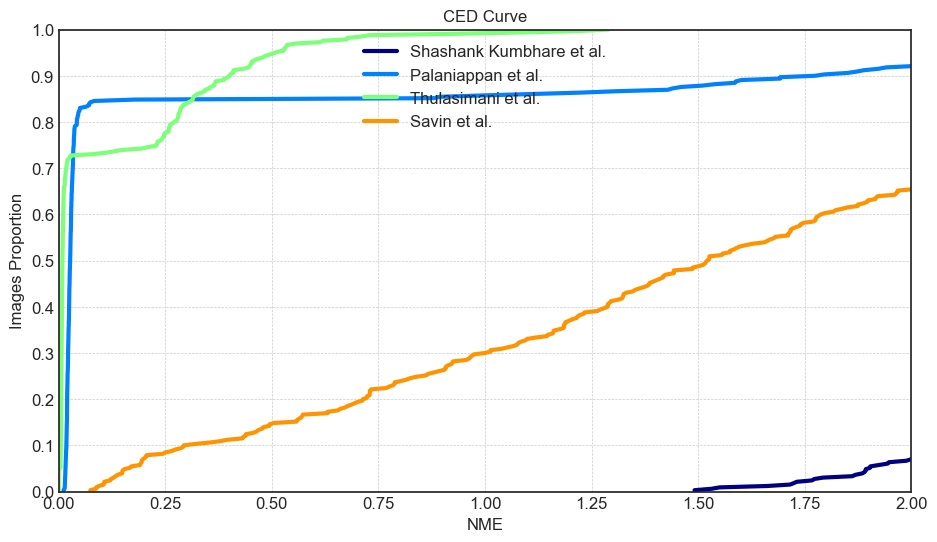

In [14]:
plot_results()